# О работе

Эта лабораторная работа направлена на изучение базовых алгоритмов без учителя и обработки текстовых данных с использыванием библиотеки scikit-learn.

Лабораторная состоит из следующих пуунктов:
1. Понижение размерности и визуализация данных.
2. Кластерный анализ
3. Обработка и классификация текстовых данных.

## Импорт необходимых для работы библиотек

In [1]:
# Установка пакета pandas
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Установка пакета numpy
%pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Установка пакета matplotlib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Установка пакета seaborn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
# Установка пакета scikit-learn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
# Установка пакета re
%pip install re

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
# Установка пакета string
%pip install string

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# Установка пакета nltk
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
# Установка пакета wordcloud
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
# Установка пакета wordcloud
%pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\schif\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
# Необходимые импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PCA and TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# K-Means
from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Text
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

## Подключение [датасета](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/)

Замечание: так как датасет я искал не одним из первых среди студентов данного курса, то он вышел не совсем совершенным, из-за чего точность работы некоторых методов оставляет желать лучшего. 

### Считываем [датасет](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability/)

In [12]:
# Загоняем датасет в переменную "data_df" 
data_df = pd.read_csv('../DATASET/DATASET.csv')

### Вывод основной информации о датасете

In [13]:
# Выводим первые несколько рядком для того, чтобы понять, правильно ли загружены данные
data_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.00,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0.0
1,3.72,129.42,18630.06,6.64,0.00,592.89,15.18,56.33,4.50,0.0
2,8.10,224.24,19909.54,9.28,0.00,418.61,16.87,66.42,3.06,0.0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0.0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0.0


In [14]:
# Выводим размер датасета
data_df.size

32760

In [15]:
# Выводим информацию о типе данных каждой отдельно взятой колонке и общую информацию о таблице
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   float64
dtypes: float64(10)
memory usage: 256.1 KB


In [16]:
# Выводим количество содержащих значение "null" ячеек для каждой колонки
data_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [17]:
# Выводим количество рядков в датасете до очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

In [18]:
# Найдём рядки со значением "#NUM!" и удалим их из набора данных
data_df = data_df[data_df != '#NUM!'].dropna()

In [19]:
# Выводим количество рядков в датасете после очищения таблицы от тех, в которых содержиться "null"
data_df.shape

(3276, 10)

### Разбиение данных

In [20]:
# Присваиваем переменной "X" таблицу, равную исходной
X = data_df
# Присваиваем переменной "y" таблицу, равную колонке 'Potability'
Y = data_df['Potability']

In [21]:
# Проверяем правильно ли выглядят тренировочные данные
X.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.00,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,0.0
1,3.72,129.42,18630.06,6.64,0.00,592.89,15.18,56.33,4.50,0.0
2,8.10,224.24,19909.54,9.28,0.00,418.61,16.87,66.42,3.06,0.0
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,0.0
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,0.0


In [22]:
print("Количество рядков в тренировочных данных: \"" + str(X.shape[0]) + "\".")

Количество рядков в тренировочных данных: "3276".


In [23]:
# Проверяем правильно выглядят тренировочные данные
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

In [24]:
print("Количество рядков в тренировочных данных: \"" + str(Y.shape[0]) + "\".")

Количество рядков в тренировочных данных: "3276".


### Масштабирование данных

In [25]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

## Principal Component Analysis

In [26]:
pca = PCA()
X_pca = pca.fit_transform(scaled_X)

In [27]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

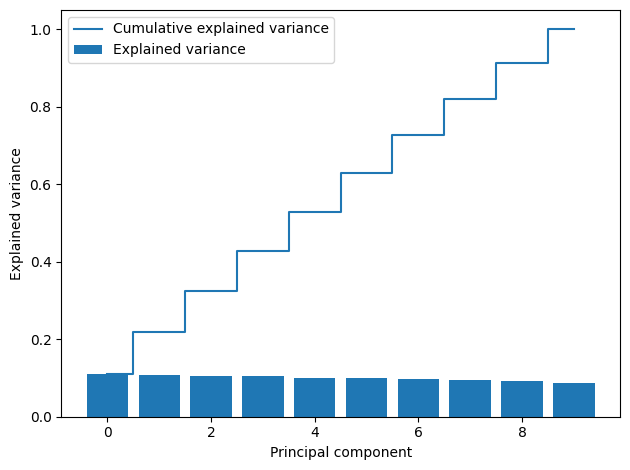

In [28]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

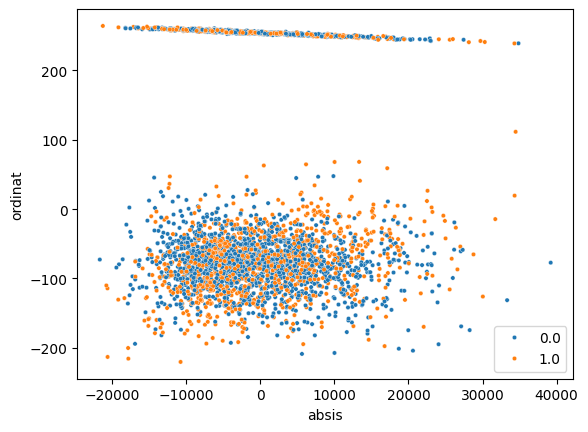

In [29]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'absis': pca_result[:,0], 'ordinat': pca_result[:,1], 'label': Y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='absis', y='ordinat', hue='label', data=pca_result_df, ax=ax,s=10)
ax.legend()

## T-distributed Stochastic Neighbor Embedding)

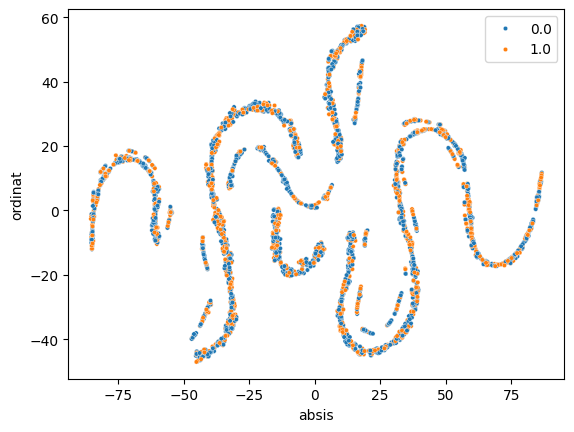

In [30]:
tsne = TSNE(n_components=2)
result = tsne.fit_transform(X)

tsne_result_df = pd.DataFrame({'absis': result[:,0], 'ordinat': result[:,1], 'label': Y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='absis', y='ordinat', hue='label', data=tsne_result_df, ax=ax,s=10)
ax.legend()

## K-means Clustering

In [49]:
def load_and_normalize_image(image_path):
    poster = plt.imread(image_path)
    return np.array(poster, dtype=np.float64) / 255

In [50]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

In [51]:
def process_image(image_array, n_clusters):
    w, h, d = image_array.shape
    image_array_flat = np.reshape(image_array, (w * h, d))

    image_array_sample = shuffle(image_array_flat, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto", random_state=0).fit(image_array_sample)

    labels = kmeans.predict(image_array_flat)

    codebook_random = shuffle(image_array_flat, random_state=0, n_samples=n_clusters)
    labels_random = pairwise_distances_argmin(codebook_random, image_array_flat, axis=0)

    return w, h, labels, codebook_random, labels_random, kmeans.cluster_centers_

In [52]:
def plot_images(image, title, subplot_number):
    plt.figure(subplot_number)
    plt.clf()
    plt.axis("off")
    plt.title(title)
    plt.imshow(image)


N = 64



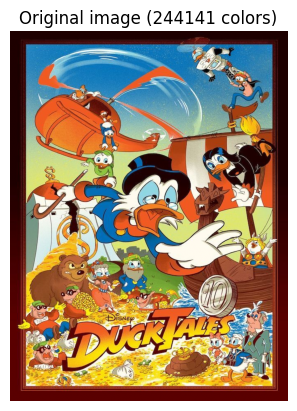

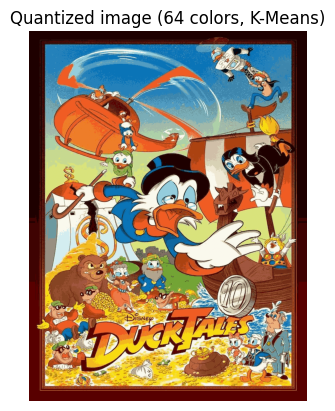

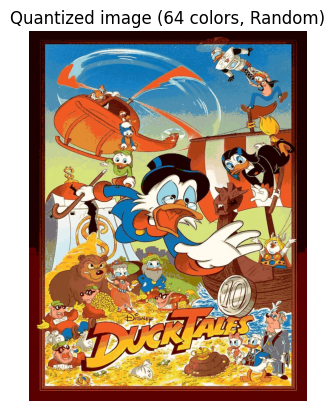


N = 32



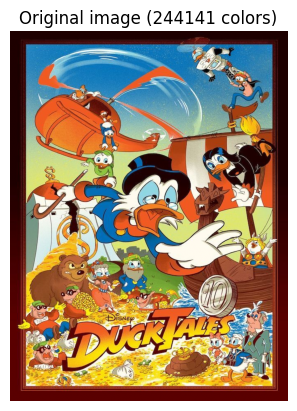

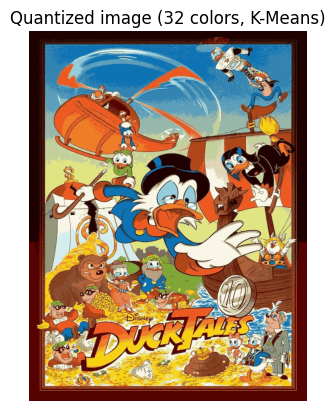

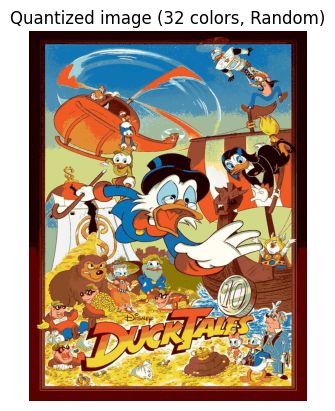


N = 16



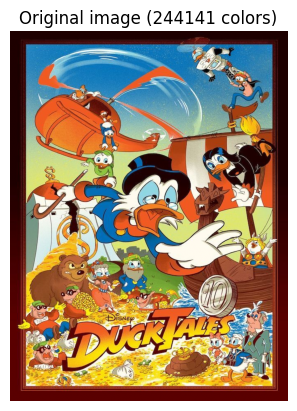

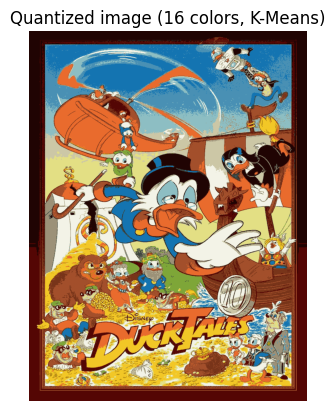

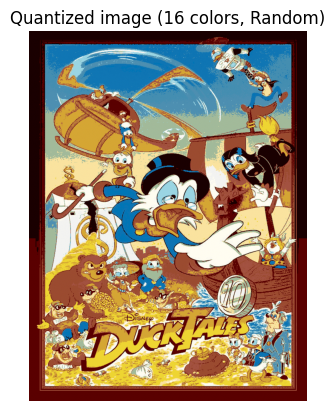


N = 8



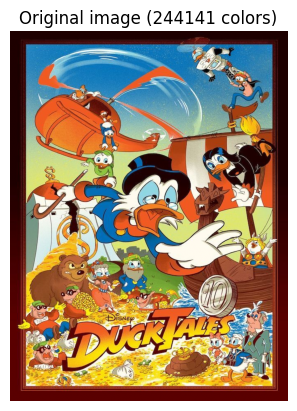

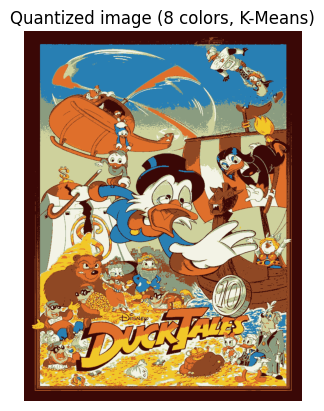

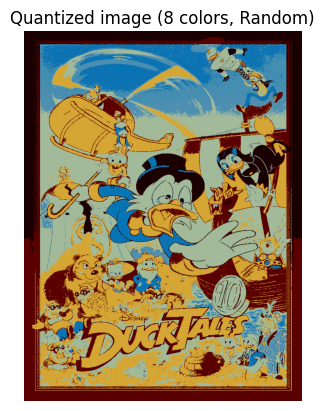

In [54]:
image_path = "../FILES/IMAGES/DUCK_TALES_POSTER.jpg"
original_image = load_and_normalize_image(image_path)

for i in [64, 32, 16, 8]:
    print(f"\nN = {i}\n")

    w, h, labels, codebook_random, labels_random, kmeans_centers = process_image(original_image, i)

    img = Image.open(image_path)
    unique_colors = set(img.getdata())
    length = len(unique_colors)

    plot_images(original_image, f"Original image ({length} colors)", 1)
    plot_images(recreate_image(kmeans_centers, labels, w, h), f"Quantized image ({i} colors, K-Means)", 2)
    plot_images(recreate_image(codebook_random, labels_random, w, h), f"Quantized image ({i} colors, Random)", 3)

    plt.show()

## Text Analysis